In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
amp=2 #range[0.0, 1.0]
sr=10000 #sampling rate, Hz 찍히는 점의 개수
dur=0.5 #in seconds
freq=440.0 #sine frequency, Hz 사인 그래프와 관련

In [3]:
t=np.arange(1, sr*dur+1)/sr 
theta=t*2*np.pi*freq
s=amp*np.cos(theta)

sr=100Hz라 해 보자. 우리가 표현할 수 있는 숫자가 1초에 100개라는 뜻. 1hz freq를 표현할 수 있는가? 어떻게 표현? 한 개의 사인 웨이브를 그리면 된다. 이런 식으로 2hz도 표현 가능. 그렇다면 10000hz는 가능한가? 10000번 왔다 갔다 하는 것은 sr이 너무 적어서 안 됨. 다른 예로 해 보자 sr=10인데 100hz를 표현할 수 있나? MAX는 반. 즉 5개의 사인 웨이브 만들 수 있다. 위의 예에서는 50개 가능 nyquist frequency=sampling rate의 절반 값. 즉 표현 가능 최대값. CD 음질=44100hz 이것의 nyquist=22050hz.인간의 가청 주파수=20000 정도. 즉 sr이 4만 정도라면 경제적으로 모든 소리 표현 가능하다는 것.

예전 유선 전화기의 sr은 8000이었음. 그래서 내용 전달은 되지만 누구의 목소리인지 헷갈릴 수 있었음. 요새 스마트폰은 16000hz임. 그래서 누군지 헷갈리지 않음. 즉 nyquist는 표현할 수 있는 freq의 최댓값이라고 생각하면 됨.

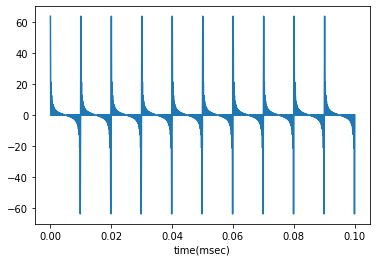

In [4]:
F0=100
Fend=int(sr/2) #제일 마지막을 의미, int를 씌워준 건 깨끗한 결과를 보기 위함이다. 안 써도 무방하긴 함.
s=np.zeros(len(t)) #s에 대한 정의를 for loop 전에 해 주기. 
for freq in range(F0, Fend+1, F0):
    theta=t*2*np.pi*freq
    s=s+amp*np.sin(theta)
flg=plt.figure()
ax=flg.add_subplot(111)
ax.plot(t[0:1000], s[0:1000])
ax.set_xlabel('time(msec)')
ipd.Audio(s, rate=sr)

In [5]:
#내부 함수
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [6]:
RG=0 #glottal resonator의 freq
BWG=100 #glottal resonator의 bandwidth
a,b=resonance(sr, RG, BWG)
s=lfilter(b,a,s,axis=0)
ipd.Audio(s, rate=sr)

In [7]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [8]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [9]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [10]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [11]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)